# Imports

In [1]:
# Instalando libs
!pip install missingno -q
!pip install lightgbm -q
!pip install xgboost -q
!pip install imblearn -q

# Importando libs
## Básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import random
import timeit
import warnings

## Configurações
sns.set()
random.seed(42)
warnings.filterwarnings('ignore')

## Pre processamento
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## Modelagem
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

## Balanceamento do dataset
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks 

# Leitura do dataset

!pip install openpyxl -q
df_raw = pd.read_csv('Dataset_Treino.csv')


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


# Modelagem inicial

In [21]:
df_inicial = df_raw.copy()
df_inicial

,ID_Aluno,Idade,Tipo_escola,Escolaridade,Estado,Municipio,Trabalhando,Estudando,Concluiu_EAD,Aprender_EAD,Recursos,Disponibilidade_Tutoria,Disponibilidade_3_Meses,Pessoas_Casa,Renda_Familiar,Conheceu_PROA,Horario_Estudando,Data_Inscrição,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso
0,1,19,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,7,Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),LinkedIn,Noite,15/09/2022,0.0,123,1
1,2,21,public,Cursando o 3º ano do Ensino Médio,RJ,Rio de Janeiro,Não,Não,Ainda não concluí um curso a distância,Eu prefiro cursos presenciais,Computador,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Junior Achievement,Manhã,15/09/2022,1.0,123,0
2,3,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,Celular próprio/Internet wifi,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Indicação de familiar,Manhã,15/09/2022,1.0,123,0
3,4,18,public,Ensino Médio concluído e não estudando,SP,Osasco,Não,Sim,Sim e fiz parcialmente pelo computador e parci...,Muito eu tenho uma rotina definida para partic...,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Noite,15/09/2022,3.0,123,0
4,5,19,public,Ensino Médio concluído e não estudando,RJ,Rio de Janeiro,Não,Não,Sim e fiz parcialmente pelo computador e parci...,Não sei dizer,Computador/Celular próprio/Tablet próprio/Inte...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Divulgação do iFood,Já concluí,15/09/2022,0.0,123,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,5351,17,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Sim,SIm e fiz totalmente pelo celular,Muito eu tenho uma rotina definida para partic...,Celular próprio,Sim,Sim,4,Até 1 salário mínimo (até R$1.100),Site de notícias,Noite,18/12/2022,0.0,29,1
3734,5353,19,public,Cursando o 3º ano do Ensino Médio,RJ,Queimados,Não,Não,Ainda não concluí um curso a distância,Muito eu tenho uma rotina definida para partic...,Celular próprio/Internet wifi,Sim,Sim,3,Até 1 salário mínimo (até R$1.100),Instagram,Já concluí,18/12/2022,0.0,29,0
3735,5354,18,public,Cursando o 3º ano do Ensino Médio,SP,São Paulo,Não,Não,Nunca realizei um curso a distância,Muito eu tenho uma rotina definida para partic...,Celular próprio/Tablet próprio/Internet wifi/I...,Sim,Sim,3,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,18/12/2022,0.0,29,1
3736,5355,18,public,Ensino Médio concluído e não estudando,SP,São Paulo,Não,Não,Nunca realizei um curso a distância,Não sei dizer,Celular próprio/Internet wifi,Sim,Sim,5,Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Instagram,Já concluí,18/12/2022,0.0,29,0


In [22]:
df_inicial.isnull().sum()

ID_Aluno                    0
Idade                       0
Tipo_escola                 0
Escolaridade                0
Estado                      0
Municipio                  11
Trabalhando                 0
Estudando                   5
Concluiu_EAD                2
Aprender_EAD                0
Recursos                    4
Disponibilidade_Tutoria     0
Disponibilidade_3_Meses     0
Pessoas_Casa                0
Renda_Familiar              0
Conheceu_PROA               0
Horario_Estudando           0
Data_Inscrição              0
Dias_Espera_Aprovacao       0
Dias_Espera_Inicio          0
Abandono_curso              0
dtype: int64

In [23]:
df_inicial.dtypes

ID_Aluno                     int64
Idade                        int64
Tipo_escola                 object
Escolaridade                object
Estado                      object
Municipio                   object
Trabalhando                 object
Estudando                   object
Concluiu_EAD                object
Aprender_EAD                object
Recursos                    object
Disponibilidade_Tutoria     object
Disponibilidade_3_Meses     object
Pessoas_Casa                object
Renda_Familiar              object
Conheceu_PROA               object
Horario_Estudando           object
Data_Inscrição              object
Dias_Espera_Aprovacao      float64
Dias_Espera_Inicio           int64
Abandono_curso               int64
dtype: object

In [24]:
# Fillna DE QUALQUER JEITO só para rodar o modelo inicial

df_inicial.fillna("sem info", inplace=True)

In [26]:
for cols in df_inicial.select_dtypes(include=['object']).columns:
    print(cols)
    print(
        np.unique(df_inicial[cols],
                  return_counts=True)
    )

Tipo_escola
(array(['public', 'scholarship'], dtype=object), array([3632,  106]))
Escolaridade
(array(['Cursando o 3º ano do Ensino Médio', 'Cursando o Ensino Superior',
       'Ensino Médio concluído', 'Ensino Médio concluído e não estudando',
       'Ensino Superior concluído'], dtype=object), array([3476,   72,   11,  172,    7]))
Estado
(array(['RJ', 'RS', 'SC', 'SP'], dtype=object), array([1343,  349,  163, 1883]))
Municipio
(array(['Adamantina', 'Aguaí', 'Alpestre', 'Alto Alegre', 'Alumínio',
       'Alvorada', 'Americana', 'Amparo', 'Andradina', 'Angatuba',
       'Angelina', 'Angra dos Reis', 'Aparecida', 'Araquari',
       'Araraquara', 'Araricá', 'Araruama', 'Araçariguama',
       'Araçoiaba da Serra', 'Armação dos Búzios', 'Arroio dos Ratos',
       'Arujá', 'Assis', 'Avaré', 'Bagé', 'Balneário Barra do Sul',
       'Balneário Camboriú', 'Bananal', 'Barra Bonita', 'Barra Mansa',
       'Barra do Ribeiro', 'Barretos', 'Barrinha', 'Barueri', 'Bauru',
       'Belford Roxo', 'Be

## get_dummies

In [30]:
# Dropando as colunas que tem muitos informações únicas para minimizar o dummies

df_dropped = (
    df_inicial
    .drop(columns=['ID_Aluno',
                   'Municipio',
                   'Recursos',
                   'Conheceu_PROA',
                   'Data_Inscrição'
                   ])
)

In [32]:
df_dummyfied = pd.get_dummies(df_dropped)
df_dummyfied

,Idade,Dias_Espera_Aprovacao,Dias_Espera_Inicio,Abandono_curso,Tipo_escola_public,Tipo_escola_scholarship,Escolaridade_Cursando o 3º ano do Ensino Médio,Escolaridade_Cursando o Ensino Superior,Escolaridade_Ensino Médio concluído,Escolaridade_Ensino Médio concluído e não estudando,Escolaridade_Ensino Superior concluído,Estado_RJ,Estado_RS,Estado_SC,Estado_SP,Trabalhando_Não,Trabalhando_Sim,Estudando_Não,Estudando_Sim,Estudando_sem info,Concluiu_EAD_Ainda não concluí um curso a distância,Concluiu_EAD_Nunca realizei um curso a distância,Concluiu_EAD_SIm e fiz totalmente pelo celular,Concluiu_EAD_Sim e fiz parcialmente pelo computador e parcialmente pelo celular,Concluiu_EAD_Sim e fiz totalmente pelo computador,Concluiu_EAD_sem info,Aprender_EAD_Eu prefiro cursos presenciais,Aprender_EAD_Muito eu tenho uma rotina definida para participar de cursos a distância,Aprender_EAD_Não sei dizer,Aprender_EAD_Quase nada,Disponibilidade_Tutoria_Não,Disponibilidade_Tutoria_Sim,Disponibilidade_3_Meses_Não,Disponibilidade_3_Meses_Sim,Pessoas_Casa_1,Pessoas_Casa_10,Pessoas_Casa_2,Pessoas_Casa_3,Pessoas_Casa_4,Pessoas_Casa_5,Pessoas_Casa_6,Pessoas_Casa_7,Pessoas_Casa_8,Pessoas_Casa_9,Pessoas_Casa_Mais que 10,Renda_Familiar_Até 1 salário mínimo (até R$1.100),Renda_Familiar_Entre 1 e 2 salários mínimos (R$1.100 – R$2.200),Renda_Familiar_Entre 2 e 3 salários mínimos (R$2.200 – R$3.300),Renda_Familiar_Entre 3 e 4 salários mínimos (R$3.300 – R$4.400),Renda_Familiar_Entre 4 e 5 salários mínimos (R$4.400 – R$5.500),Renda_Familiar_Mais que 5 salários mínimos (mais que R$5.500),Horario_Estudando_Integral,Horario_Estudando_Já concluí,Horario_Estudando_Manhã,Horario_Estudando_Noite,Horario_Estudando_Tarde
0,19,0.0,123,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,21,1.0,123,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,17,1.0,123,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,18,3.0,123,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,19,0.0,123,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,17,0.0,29,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3734,19,0.0,29,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3735,18,0.0,29,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3736,18,0.0,29,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


## Split train/test

In [61]:
# Separando as features do dataset e a target

features_raw = df_dummyfied.drop(columns=['Abandono_curso'])

target_raw = df_dummyfied['Abandono_curso']

# Sanity check
print('Tamanho do DF das features: ' + str(features_raw.shape))
print('Tamanho do DF da target: ' + str(target_raw.shape))

Tamanho do DF das features: (3738, 55)
Tamanho do DF da target: (3738,)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(features_raw,
                                                    target_raw,
                                                    test_size = 0.1,
                                                    random_state = 42,
                                                    stratify = target_raw)

# Sanity check
print('Tamanho do dataset de treino: ' + str(len(y_train)))
print('Tamanho do dataset de teste: ' + str(len(y_test)))
print('Proporção da target no treino: ' + str(y_train.values.sum()/len(y_train)))
print('Proporção da target no teste: ' + str(y_test.values.sum()/len(y_test)))

# Check de consistência
assert len(y_train)+len(y_test) == len(target_raw)

Tamanho do dataset de treino: 3364
Tamanho do dataset de teste: 374
Proporção da target no treino: 0.7208680142687277
Proporção da target no teste: 0.7219251336898396


## Treino inicial

In [63]:
# Função que treina diversos modelos e retorna as principais métricas.

def Efic(lista_classifiers,
         xtrain,
         xtest,
         ytrain,
         ytest):
    '''
    Função que recebe lista de classificadores, divisão de treino/teste e retorna a performance dos modelos
    '''
    
    df_modelo = pd.DataFrame(columns=[0,1,2,3,4,5,6,7])
    
    for clf in lista_classifiers:
        start_clf = timeit.default_timer()
        
        # fit do treino
        clf.fit(xtrain,ytrain)
        
        #Matriz de confusao do teste
        ypred = clf.predict(xtest)
        conf_mat = metrics.confusion_matrix(ytest,ypred)
        tn, fp, fn, tp = metrics.confusion_matrix(ytest, ypred).ravel()
        
        # Calculando as metricas
        acc  = metrics.accuracy_score(ytest,ypred)
        sens = metrics.recall_score(ytest,ypred)
        spec = tn/(tn+fp)
        prec = metrics.precision_score(ytest,ypred)
        FPR  = fp/(fp+tn)
        AUC  = metrics.roc_auc_score(ytest,ypred)
        F1S  = metrics.f1_score(ytest,ypred)
        stop_clf = timeit.default_timer()
        
        #adicionando no DF:
        df_modelo = df_modelo.append([[clf.__class__.__name__,
                                       acc,
                                       sens,
                                       spec,
                                       prec,
                                       FPR,
                                       AUC,
                                       F1S,
                                       (stop_clf-start_clf)/60]])
        
        print("O modelo",clf.__class__.__name__,
              "foi treinado e testado em",
              str(round(stop_clf-start_clf,2)),
              "segundos")

    dic_columns = {0:'Modelo',
                   1:'Accuracy',
                   2:'Sensitivity/Recall(TPR)',
                   3:'Specificity(TNR)',
                   4:'Precision(PPV)',
                   5:'FPR',
                   6:'AUC',
                   7:'F1 Score',
                   8:'CPU time'}
    
    df_modelo.rename(columns = dic_columns,inplace=True)
    
    return round(df_modelo,3), clf

In [64]:
%%time

lista_classifiers = [
    KNeighborsClassifier(),
    LogisticRegression(solver='liblinear'),
    DecisionTreeClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    lgb.LGBMClassifier(verbosity=-1),
    XGBClassifier()]

df_modelo, lista_clf = Efic(lista_classifiers,
                            X_train,
                            X_test,
                            y_train,
                            y_test)

O modelo KNeighborsClassifier foi treinado e testado em 0.03 segundos
O modelo LogisticRegression foi treinado e testado em 0.07 segundos
O modelo DecisionTreeClassifier foi treinado e testado em 0.08 segundos
O modelo GradientBoostingClassifier foi treinado e testado em 0.55 segundos
O modelo GaussianNB foi treinado e testado em 0.02 segundos
O modelo RandomForestClassifier foi treinado e testado em 0.53 segundos
O modelo LGBMClassifier foi treinado e testado em 0.12 segundos
O modelo XGBClassifier foi treinado e testado em 0.15 segundos
CPU times: user 5.29 s, sys: 1.23 s, total: 6.51 s
Wall time: 1.57 s


In [65]:
df_modelo.set_index('Modelo').T

Modelo,KNeighborsClassifier,LogisticRegression,DecisionTreeClassifier,GradientBoostingClassifier,GaussianNB,RandomForestClassifier,LGBMClassifier,XGBClassifier
Accuracy,0.709,0.773,0.628,0.770,0.741,0.749,0.762,0.730
Sensitivity/Recall(TPR),0.900,0.981,0.715,0.970,0.926,0.937,0.941,0.896
Specificity(TNR),0.212,0.231,0.404,0.250,0.260,0.260,0.298,0.298
Precision(PPV),0.748,0.768,0.757,0.771,0.765,0.767,0.777,0.768
FPR,0.788,0.769,0.596,0.750,0.740,0.740,0.702,0.702
AUC,0.556,0.606,0.559,0.610,0.593,0.598,0.619,0.597
F1 Score,0.817,0.862,0.735,0.859,0.838,0.843,0.851,0.827
CPU time,0.001,0.001,0.001,0.009,0.000,0.009,0.002,0.003


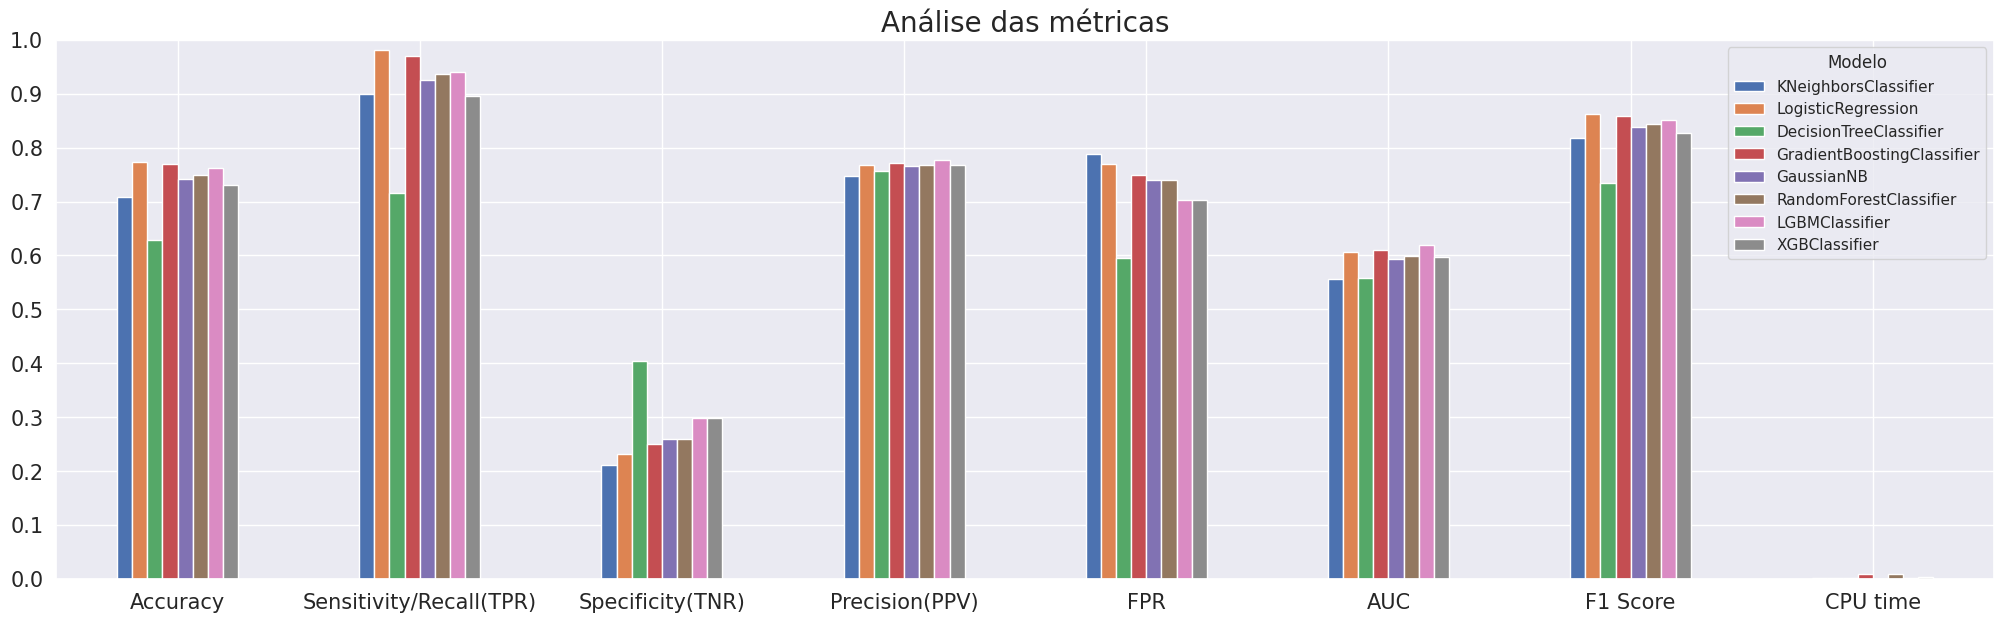

In [66]:
df_modelo.set_index('Modelo').T.plot.bar(figsize=(25,7));
plt.ylim(0,1);
plt.xticks(rotation=0,fontsize=15);
plt.yticks(np.arange(0,1.1,0.1),fontsize=15);
plt.title('Análise das métricas',fontsize=20);
plt.show()

## Exemplo de otimização de hiperparametros

In [70]:
# Exemplo de otimização MANUAL dos hiperparametros.

lista_clf_selecionados = [XGBClassifier(),
                          RandomForestClassifier(),
                          GradientBoostingClassifier()]

XGBoost_param_dic = {'min_child_weight': [1, 5, 10],
                     'gamma': [0.5, 1, 2],
                     'subsample': [0.6, 1.0],
                     'colsample_bytree': [0.6, 0.8],
                     'max_depth': [3, 5]
                     }

RForest_param_dic = {'bootstrap': [True, False],
                     'max_depth': [10, 50, 100],
                     'min_samples_leaf': [1, 3],
                     'min_samples_split': [2, 5, 10],
                     'n_estimators': [100, 500, 1000]
                     }

GradBoost_dic = {"learning_rate": [0.01, 0.1, 0.2],
                 "min_samples_split": [0.1, 0.5],
                 "min_samples_leaf": [0.1, 0.5],
                 "max_depth":[3, 5, 8],
                 "subsample":[0.3, 0.6, 0.9],
                 "n_estimators": [100, 500, 1000]
                }

lista_clf_hipparam = [XGBoost_param_dic,
                      RForest_param_dic,
                      GradBoost_dic]

In [71]:
def otim_parametros(lista_clf,
                    lista_hiper,
                    x_train,
                    y_train,
                    x_test,
                    y_test,
                    num_folds,
                    verb = 1):
    '''
    Função que recebe modelos, range de parametros e otimiza os modelos através da função GridSearchCV
    '''

    dic_melhores_params = {}
    dic_best_score      = {}
    dic_results         = {}
    
    # Grid Search em cada classifier da lista
    for indice in range(len(lista_clf)):
        start = timeit.default_timer()
        
        # parametrizando o modelo
        clf = GridSearchCV(lista_clf[indice],
                           lista_hiper[indice],
                           cv = num_folds,
                           verbose = verb,
                           scoring=['recall',
                                    'f1'],
                           refit = 'recall'
                       )
        
        # ajustando o modelo
        clf.fit(x_train,y_train)
        
        # salvando os parâmetros
        dic_melhores_params[lista_clf[indice].__class__.__name__] = clf.best_params_
        dic_best_score[lista_clf[indice].__class__.__name__]      = clf.best_score_
        dic_results[lista_clf[indice].__class__.__name__]         = clf.cv_results_
        end = timeit.default_timer()
        
        tempo = round((end-start)/60,2)
        
        print('Para o modelo ',
              lista_clf[indice].__class__.__name__,
              ', o melhor score foi de ',
              round(clf.best_score_,3),
              'e levou ',
              tempo,
              'minutos')
    
    return [dic_melhores_params,
            dic_best_score,
            dic_results]

In [73]:
%%time

lista_resultados = otim_parametros(lista_clf_selecionados,
                                   lista_clf_hipparam,
                                   X_train,
                                   y_train,
                                   X_test,
                                   y_test,
                                   num_folds = 3)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Para o modelo  XGBClassifier , o melhor score foi de  0.992 e levou  0.39 minutos
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Para o modelo  RandomForestClassifier , o melhor score foi de  0.993 e levou  10.19 minutos
Fitting 3 folds for each of 324 candidates, totalling 972 fits
Para o modelo  GradientBoostingClassifier , o melhor score foi de  1.0 e levou  14.93 minutos
CPU times: user 29min 47s, sys: 2.6 s, total: 29min 49s
Wall time: 25min 30s


In [ ]:
# Tá estranho esse gradient com 100% de score, dá uma olhada. 
# As vezes a métrica que foi escolhida é ruim pra esse problema. Se deu 100% já desconfia, é treta

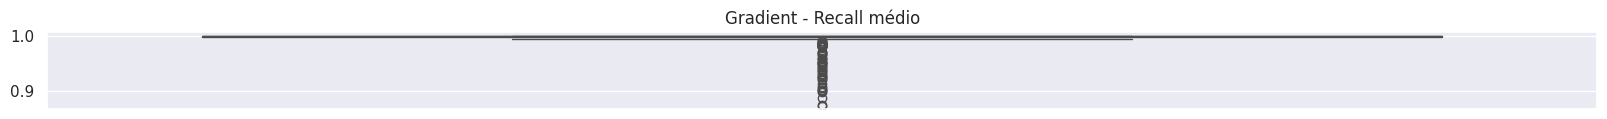

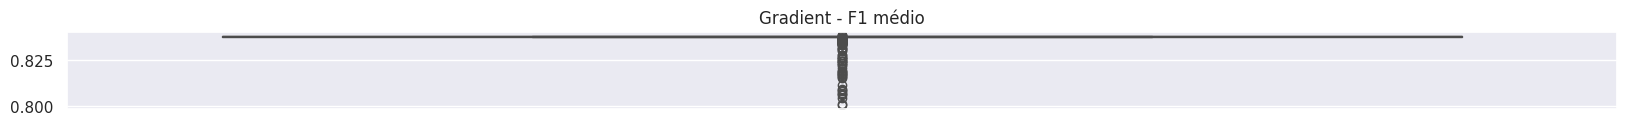

In [74]:
# Saiu cagado, se vira ai pra consertar e botar na horizontal. Tá outlier aparentemente
plt.figure(figsize=(20,1))
plt.xlim(0,1)
plt.title('Gradient - Recall médio')
sns.boxplot(list(lista_resultados[2]['GradientBoostingClassifier']['mean_test_recall']))
plt.show()

plt.figure(figsize=(20,1))
plt.xlim(0,1)
plt.title('Gradient - F1 médio')
sns.boxplot(list(lista_resultados[2]['GradientBoostingClassifier']['mean_test_f1']))
plt.show()

In [75]:
lista_clf_selecionados = [XGBClassifier(),
                          RandomForestClassifier()]

XGBoost_param_dic = {'min_child_weight': [3, 5, 7],
                     'gamma': [0.2, 0.5, 5],
                     'subsample': [0.7, 0.8, 1.0],
                     'colsample_bytree': [0.4,0.5,0.6, 0.9],
                     'max_depth': [2, 3, 4]
                     }

RForest_param_dic = {'bootstrap': [False],
                     'max_depth': [3,5,7,10],
                     'min_samples_leaf': [1, 3, 5, 10],
                     'min_samples_split': [3, 5, 7],
                     'n_estimators': [300, 400, 500, 700, 900]
                     }

In [ ]:
%%time

lista_resultados_2 = otim_parametros(lista_clf_selecionados,
                                     lista_clf_hipparam,
                                     X_train,
                                     y_train,
                                     X_test,
                                     y_test,
                                     num_folds = 3)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Para o modelo  XGBClassifier , o melhor score foi de  0.992 e levou  0.39 minutos
Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
plt.figure(figsize=(20,1))
plt.xlim(0.7, 0.8)
plt.title('XGB - Recall médio')
sns.boxplot(list(lista_resultados_2[2]['XGBClassifier']['mean_test_recall']))
plt.show()
plt.figure(figsize=(20,1))
plt.xlim(0.7, 0.8)
plt.title('XGB - F1 médio')
sns.boxplot(list(lista_resultados_2[2]['XGBClassifier']['mean_test_f1']))
plt.show()
plt.figure(figsize=(20,1))
plt.xlim(0.7, 0.8)
plt.title('Random Forest - Recall médio')
sns.boxplot(list(lista_resultados_2[2]['RandomForestClassifier']['mean_test_recall']))
plt.show()
plt.figure(figsize=(20,1))
plt.xlim(0.7, 0.8)
plt.title('Random Forest - F1 médio')
sns.boxplot(list(lista_resultados_2[2]['RandomForestClassifier']['mean_test_f1']))
plt.show()

## Ideias Feature Engineering

- Tipo_escola: talvez faça sentido agrupar ensino médio concluido ou mais. Verificar a proporção da target nesses casos. Se tiver uma média mt baixa para quem tem ensino ou médio, agrupa tudo na mesma classificação.

- Municipio: Procurar top 10 ofensores e transformar em Top 10 vs Resto. Pode ser que mais granularidade ajude o modelo. Precisa ir testando e vendo se ajuda ou nao o modelo.

- O racional de verificar onde estão maiores ofensores e agrupar quem não é mt ofensor/quem é mt ofensor, vou indicar o caminho para ideias diferentes.

- Recursos - criaria flags para cada um. Ex: Flag para quem tem celular compartilhado, quem tem internet 4g, quem tem tablet compartilhado..

- transformando Data Inscrição em delay weeks - Ideia seria pegar a menor data (01/10/2022) e chamar de semana 0. A partir dai calcular a semana posterior a isso. Ex: 08/10/2022 seria semana 1 e assim por diante

## Sugestão do que pesquisar

Gosto muito do canal do StatsQuest. Fala de machine learning.

- Bibliotecas principais de ML: sklearn (scaling, train_test_split, fit, predict, metrics..)
- Estudar métricas de problemas de classificação (statsquest tem isso certamente)
- Estudar como cada modelo que foi usado funciona, é interessante entender para definir qual aplicar em cada problema. Statsquest tem todos os modelos com ÓTIMA didática e mt piada de tiozão
- Para treinar modelo: modelo.fit(train_features, train_target). Dps modelo.predict(test_target) vai te dar as respostas do csv que precisa subir no kaggle
- Estudar formas de otimização AUTOMATICA de hiperparametros: GridSearchCV, Optuna (uso esse no trabalho) e HyperOpt